#Speech to Digit Conversion using Keras and librosa

## Roji Augustine
## References
## https://keras.io/
## https://librosa.org/
## https://streamlit.io/


In [ ]:
# Final

from IPython.display import Audio

import librosa
import librosa.display

from sklearn.model_selection import train_test_split
import tensorflow as tf
print(tf.__version__)

from google.colab import drive
import os
import glob
import random
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics
from tensorflow.keras.utils import to_categorical

from collections import Counter
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
import seaborn as sns
from keras import metrics
import IPython.display as ipd

2.8.0


In [ ]:
def features_extractor(audio, sample_rate):
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)    
    return mfccs_scaled_features

def plot_specgram(samples, sample_rate):
     plt.figure(figsize=(6, 3))
     librosa.display.waveplot(samples, sr=sample_rate)
     sgram = librosa.stft(samples)
     librosa.display.specshow(sgram)

def plot_label_count(dict_count, title):
    df_label = pd.DataFrame({'Label' : dict_count.keys() , 'Count' :  dict_count.values() } ) 
    sns.barplot(x=df_label.Label, y=df_label.Count)
    plt.xticks(rotation=90)
    plt.title(title, fontsize=16)       

In [ ]:
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/recordings"
os.chdir(root_dir)
file_list = glob.glob("*.wav")

Mounted at /content/gdrive


In [ ]:
frame_len_list = []
sampling_rate_list = []
raw_features = []
mfccs_features = []
#for audio_file in random.sample(glob_list,50):
for audio_file in file_list:
      audio, sample_rate = librosa.load(audio_file, res_type='kaiser_fast') 
      frame_len = audio.shape[0]
      frame_len_list.append(frame_len)
      sampling_rate_list.append(sample_rate)
      class_id = int(os.path.splitext(audio_file)[0].split('_')[0])
      raw_features.append([audio, class_id])
      mfccs_features.append([features_extractor(audio, sample_rate), class_id])
      #print(f'Sample rate : {sr}, Number of channels : {num_channels}, Frame length : {frame_len}    ')

In [ ]:
df_raw_features = pd.DataFrame(raw_features, columns = ['feature', 'class'])
df_mfcc_features = pd.DataFrame(mfccs_features, columns = ['feature', 'class'])

# Analysis on raw audio files

0_yweweler_39.wav


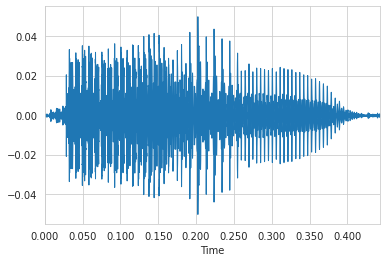

In [ ]:
print(audio_file)
librosa.display.waveplot(audio,sr=sample_rate)
ipd.Audio(audio_file)

/usr/local/lib/python3.7/dist-packages/librosa/display.py:955: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  "Trying to display complex-valued input. " "Showing magnitude instead."


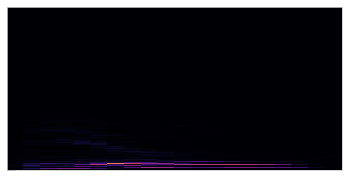

In [ ]:
plot_specgram(audio, sample_rate)

##Frame length is varying a lot. Let us plot a histogram on frame length

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Frame Length')]

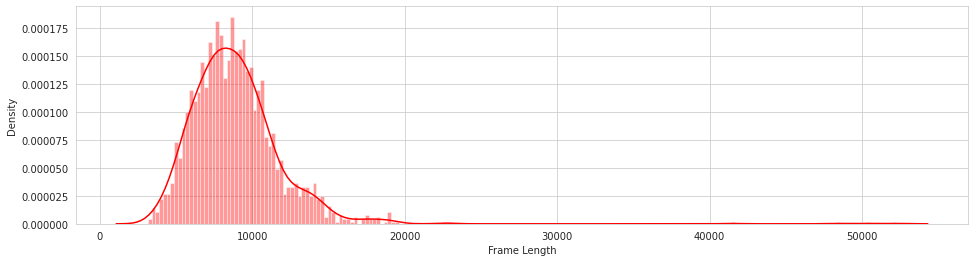

In [ ]:
_, ax = plt.subplots(figsize=(16, 4))
sns.set_style('whitegrid')
sns.distplot(frame_len_list, kde = True, color ='red', bins = 200)
ax.set(xlabel='Frame Length')

#Bar plot showing file name Vs frame length for few files

Text(0.5, 1.0, 'Distribution of audio frames')

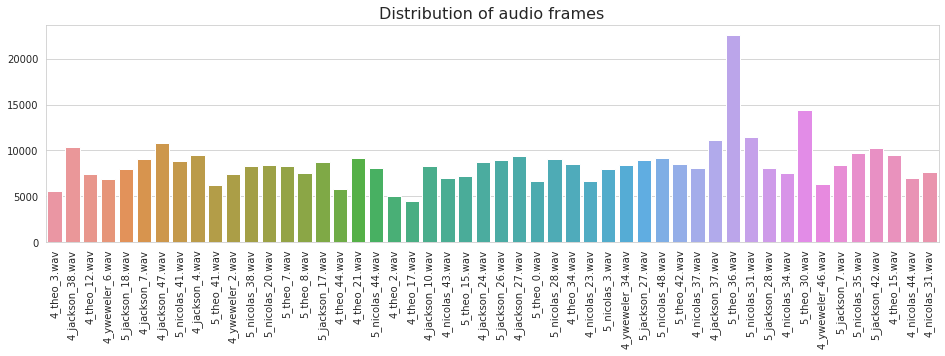

In [ ]:
_, ax = plt.subplots(figsize=(16, 4))
sns.barplot(x=file_list[:50], y=frame_len_list[:50])
plt.xticks(rotation=90)
plt.title('Distribution of audio frames', fontsize=16)

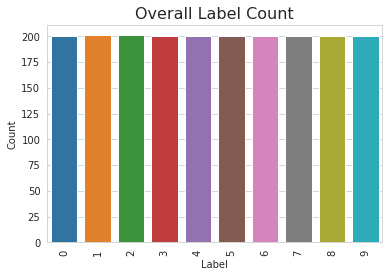

In [ ]:
plot_label_count(dict(df_mfcc_features['class'].value_counts()), "Overall Label Count")

# Analysis of small and large  files. If required we can remove small files and truncate the files which are really long. 

In [ ]:
# files with length < 3200
small_files = [file for file in file_list if file_list.index(file) in np.where(np.array(frame_len_list) < 3200)[0]]
print(small_files)

['6_yweweler_3.wav', '6_nicolas_7.wav']


3167


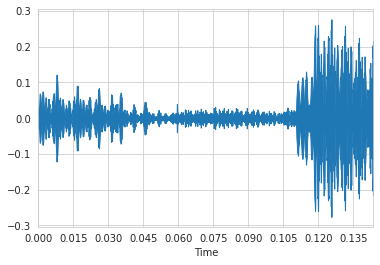

In [ ]:
audio, sample_rate = librosa.load('6_nicolas_7.wav', res_type='kaiser_fast') 
print(audio.shape[0])
librosa.display.waveplot(audio,sr=sample_rate)
ipd.Audio(audio_file)

In [ ]:
# files with length > 18000
large_files = [file for file in file_list if file_list.index(file) in np.where(np.array(frame_len_list) > 18000)[0]]
print(large_files)

['5_theo_36.wav', '6_jackson_18.wav', '6_jackson_10.wav', '6_jackson_15.wav', '6_jackson_23.wav', '7_theo_36.wav', '6_jackson_12.wav', '6_jackson_0.wav', '6_jackson_8.wav', '6_jackson_9.wav', '6_jackson_3.wav', '6_jackson_11.wav', '6_jackson_32.wav', '9_theo_16.wav', '9_theo_29.wav', '9_theo_27.wav', '9_theo_28.wav', '1_roji_0.wav.wav', '2_roji_0.wav.wav']


18975


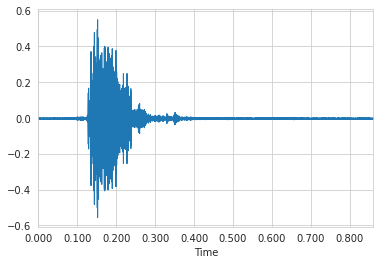

In [ ]:
audio, sample_rate = librosa.load('6_jackson_12.wav', res_type='kaiser_fast') 
print(audio.shape[0])
librosa.display.waveplot(audio,sr=sample_rate)
ipd.Audio(audio_file)

# Scatter plot for sampling rate

Text(0.5, 1.0, 'Distribution of Sampling rate')

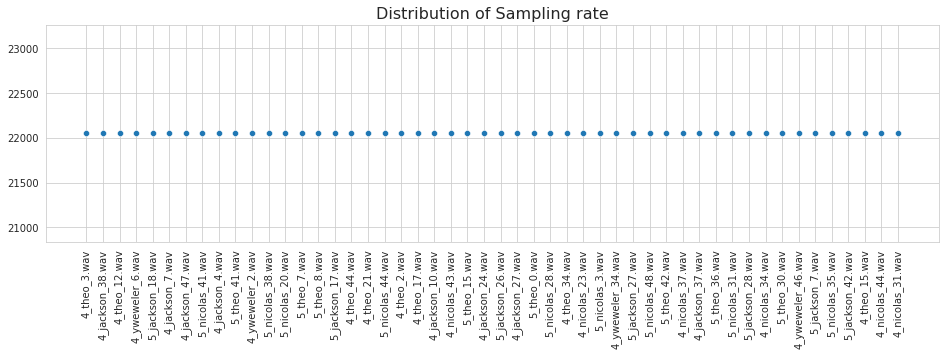

In [ ]:
import matplotlib.pyplot as plt
_, ax = plt.subplots(figsize=(16, 4))
sns.scatterplot(x=file_list[:50], y=sampling_rate_list[:50])
plt.xticks(rotation=90)
plt.title('Distribution of Sampling rate', fontsize=16)

In [ ]:
df_mfcc_features

,feature,class
0,"[-561.0658, 225.64342, -9.226658, -4.636629, 2...",4
1,"[-294.78867, 219.18217, -6.9632654, -20.743155...",4
2,"[-573.74243, 215.96965, -11.566997, -3.077398,...",4
3,"[-487.81546, 222.26689, -39.717773, -23.039877...",4
4,"[-324.35046, 245.14505, -44.03993, -11.031328,...",5
...,...,...
1997,"[-588.81964, 221.5852, -32.07324, 6.7235093, 2...",1
1998,"[-366.3211, 202.93552, -41.954834, 38.21075, 4...",0
1999,"[-552.4142, 230.22182, -30.306042, 5.1094193, ...",0
2000,"[-526.6426, 217.71765, -32.13359, 0.011702033,...",1


In [ ]:
df_raw_features

,feature,class
0,"[-0.0003358421, -0.0005069162, -0.0006031967, ...",4
1,"[-0.010654217, -0.009932298, -0.006256743, -0....",4
2,"[-0.00028933858, -0.0002489117, -0.00015910622...",4
3,"[-0.00015461139, -0.00018323878, -0.0002021998...",4
4,"[-0.01139883, -0.015453712, -0.01862484, -0.02...",5
...,...,...
1997,"[0.0001282273, 0.00021126863, 0.00024605257, 0...",1
1998,"[-0.0023962818, -0.0044062906, -0.0050452724, ...",0
1999,"[9.1948905e-06, 9.998083e-06, -9.987432e-06, -...",0
2000,"[0.0003884616, 0.00039761854, 0.00035465465, 0...",1


In [ ]:
X=np.array(df_mfcc_features['feature'].to_list())
y=np.array(df_mfcc_features['class'].to_list())
y = to_categorical(y)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1601, 40), (401, 40), (1601, 10), (401, 10))

## Label Count in Train set after split

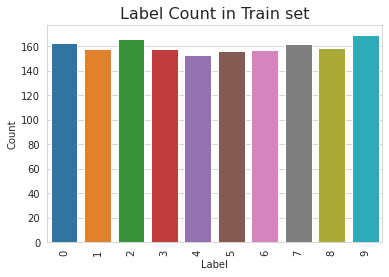

In [ ]:
plot_label_count(dict(Counter([np.argmax(i) for i in y_train] )), "Label Count in Train set")

## Label Count in Validation set after split

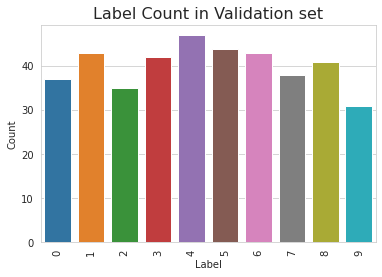

In [ ]:
plot_label_count(dict(Counter([np.argmax(i) for i in y_test] )), "Label Count in Validation set")

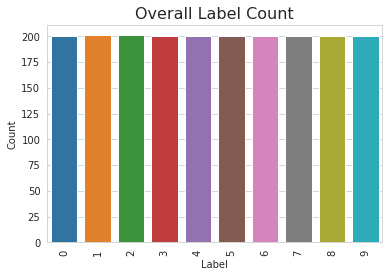

In [ ]:
plot_label_count(dict(df_mfcc_features['class'].value_counts()), "Overall Label Count")

In [ ]:
X_train = np.expand_dims(X_train, axis=1)

In [ ]:
X_test = np.expand_dims(X_test, axis=1)

In [ ]:
y_train = np.expand_dims(y_train, axis=1)

In [ ]:
y_test = np.expand_dims(y_test, axis=1)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1601, 1, 40), (401, 1, 40), (1601, 1, 10), (401, 1, 10))

In [ ]:
num_classes = 10

In [ ]:
model=Sequential()
###first layer
model.add(Dense(300,input_shape=(1,40)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
###second layer
model.add(Dense(400))
model.add(Activation('relu'))
model.add(Dropout(0.2))
###third layer
model.add(Dense(300))
model.add(Activation('relu'))
model.add(Dropout(0.2))

###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.2))

###final layer
model.add(Dense(num_classes))
model.add(Activation('softmax'))


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1, 300)            12300     
                                                                 
 activation_5 (Activation)   (None, 1, 300)            0         
                                                                 
 dropout_4 (Dropout)         (None, 1, 300)            0         
                                                                 
 dense_6 (Dense)             (None, 1, 400)            120400    
                                                                 
 activation_6 (Activation)   (None, 1, 400)            0         
                                                                 
 dropout_5 (Dropout)         (None, 1, 400)            0         
                                                                 
 dense_7 (Dense)             (None, 1, 300)           

In [ ]:
# 0.9856 - 0.9800
optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
    name='Adam'
)

In [ ]:
#optimizer = keras.optimizers.Adam(lr=0.01)
#model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')
model.compile(loss='categorical_crossentropy',metrics=[metrics.categorical_accuracy],optimizer=optimizer)

In [ ]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

#num_epochs = 100
num_epochs = 300
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

history = model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)

duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/300
51/51 [==============================] - ETA: 0s - loss: 8.4041 - categorical_accuracy: 0.1156
Epoch 1: val_loss improved from inf to 2.29497, saving model to audio_classification.hdf5
51/51 [==============================] - 2s 19ms/step - loss: 8.4041 - categorical_accuracy: 0.1156 - val_loss: 2.2950 - val_categorical_accuracy: 0.0748
Epoch 2/300
47/51 [==========================>...] - ETA: 0s - loss: 2.4263 - categorical_accuracy: 0.1070
Epoch 2: val_loss did not improve from 2.29497
51/51 [==============================] - 1s 10ms/step - loss: 2.4201 - categorical_accuracy: 0.1056 - val_loss: 2.3030 - val_categorical_accuracy: 0.1022
Epoch 3/300
47/51 [==========================>...] - ETA: 0s - loss: 2.3255 - categorical_accuracy: 0.1290
Epoch 3: val_loss did not improve from 2.29497
51/51 [==============================] - 0s 10ms/step - loss: 2.3244 - categorical_accuracy: 0.1280 - val_loss: 2.3015 - val_categorical_accuracy: 0.1097
Epoch 4/300
48/51 [==============

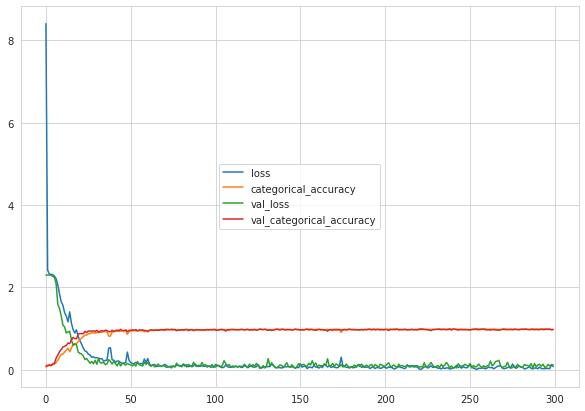

In [ ]:
pd.DataFrame(history.history).plot(figsize=(10,7))
plt.legend(loc='center')
plt.show()

## Prediction with random samples from train / test data

In [ ]:
for i in range(10):
    file = random.sample(file_list,1)
    audio, sample_rate = librosa.load(file[0], res_type='kaiser_fast') 
    X = features_extractor(audio, sample_rate)
    print(f' {file[0]} :  {np.argmax(model.predict(X.reshape(1,1,-1)))}' )

 1_nicolas_13.wav :  1
 8_theo_10.wav :  8
 6_yweweler_13.wav :  6
 5_jackson_14.wav :  5
 8_theo_30.wav :  8
 2_yweweler_8.wav :  2
 7_theo_49.wav :  7
 6_nicolas_25.wav :  6
 8_nicolas_29.wav :  8
 9_yweweler_47.wav :  9


In [ ]:
#from google.colab import files
#files.upload()

In [ ]:
model.save('../keras_digit')

INFO:tensorflow:Assets written to: ../keras_digit/assets
